In [7]:
import pandas as pd
import pickle
import seaborn as sns
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold , cross_val_score
from sklearn import metrics 
from matplotlib import pyplot as plt
from numpy import mean
from numpy import absolute
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot
from tensorflow.keras.models import load_model
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

Functions

In [8]:
def calculateMetrics(clf, X_test, y_test):
    k = 5
    cv = KFold(n_splits=k, random_state=None)

    scores_a = cross_val_score(clf, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
    accuracy = mean(absolute(scores_a))

    scores_p = cross_val_score(clf, X_test, y_test, scoring='precision', cv=cv, n_jobs=-1)
    precision = mean(absolute(scores_p))

    scores_r = cross_val_score(clf, X_test, y_test, scoring='recall', cv=cv, n_jobs=-1)
    recall = mean(absolute(scores_r))

    scores_f1 = cross_val_score(clf, X_test, y_test, scoring='f1', cv=cv, n_jobs=-1)
    f1 = mean(absolute(scores_f1))

    print("Accuracy: %.8f" %accuracy)
    print("Precision: %.8f" %precision)
    print("Recall: %.8f" %recall)
    print("F1: %.8f" %f1)

    return accuracy, precision, recall, f1

def calculateMetricsNN(clf, X_test, y_test):
    predicted = clf.predict(X_test, verbose=0)
    predicted_classes =  (clf.predict(X_test) > 0.5).astype("int32")
    # reduce to 1d array
    predicted = predicted[:, 0]
    predicted_classes = predicted_classes[:, 0]

    accuracy = accuracy_score(y_test, predicted_classes)
    precision = precision_score(y_test, predicted_classes)
    recall = recall_score(y_test, predicted_classes)
    f1 = f1_score(y_test, predicted_classes)

    print("Accuracy: %.8f" %accuracy)
    print("Precision: %.8f" %precision)
    print("Recall: %.8f" %recall)
    print("F1: %.8f" %f1)

    return accuracy, precision, recall, f1, predicted, predicted_classes

def featureImportance(clf):
    featureImportance= pd.DataFrame(columns=['Feature', 'Score'])

    importance = clf.feature_importances_
    for p,v in enumerate(importance):
        featureImportance = featureImportance.append({'Feature':p,'Score': v}, ignore_index=True)
    plt.figure(figsize=(20, 5))
    ax = sns.barplot(x=featureImportance.Feature, y=featureImportance.Score, data=featureImportance, color='#00338d')

    featureImportance.to_csv('featureImportance_dte.csv')

    features = ['Erstloesung','Schwierigkeit','Wochentag','ist_Schulzeit','MehrfachFalsch','Testposition__FT', 'Testposition__nt', 'Testposition__pruefung',
       'Testposition__training', 'Testposition__version', 'Testposition__vt',
       'Testposition__zt', 'beendet', 'Fehler', 'HA__HA', 'HA__Self', 'HA__nt',
       'HA__vt', 'HA__zt', 'Klassenstufe', 'Jahredabei', 
       'Sex__m', 'Sex__w']


def confusionMatrix(y_test, predicted, clf, X_test):
    #print(metrics.confusion_matrix(y_test, predicted))
    plot_confusion_matrix(clf, X_test, y_test)  
    plt.show()

def predictX(clf, X_test):
    predicted = clf.predict(X_test)
    return predicted

# def getProbability(clf, X_test):
#     probability = clf.predict_proba(X_test)
#     t = probability[:,:1].tolist()
#     df_prob = pd.DataFrame(t)
#     return df_prob

def precision_recall_curve(y_test, df_prob):
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, df_prob)    
    # plot the precision-recall curves
    no_skill = len(y_test[y_test==1]) / len(y_test)
    pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    pyplot.plot(lr_recall, lr_precision, marker='.')
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    pyplot.legend()
    pyplot.show()
     


Decision Tree

In [9]:
DTE_model = pickle.load(open('../02_decisionTree/DecisionTreemodel_3months.pkl', 'rb'))
X_test_DTE = pickle.load(open('../02_decisionTree/X_test_3months.pkl', 'rb'))
y_test_DTE = pickle.load(open('../02_decisionTree/y_test_3months.pkl', 'rb'))

c:\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [11]:
#accuracy, precision, recall, f1 = calculateMetrics(DTE_model, X_test_DTE, y_test_DTE)
predicted = predictX(DTE_model, X_test_DTE)


c:\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [5]:
#confusionMatrix(y_test_DTE, predicted, DTE_model, X_test_DTE)

In [6]:
#featureImportance(DTE_model)

Text(0.5, 0, 'p')

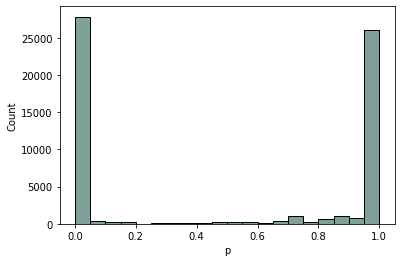

In [12]:
df_prob = pickle.load(open('../02_decisionTree/df_prob_3months.pkl', 'rb'))
sns.histplot(data=df_prob, x=df_prob[0], color="#518177")
plt.xlabel('p')

Logistic Regression

In [8]:
logreg_model = pickle.load(open('../03_logisticRegression/Logregmodel_3months.pkl', 'rb'))
X_test_logreg = pickle.load(open('../03_logisticRegression/X_test_3months.pkl', 'rb'))
y_test_logreg = pickle.load(open('../03_logisticRegression/y_test_3months.pkl', 'rb'))

c:\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [9]:
accuracy, precision, recall, f1 = calculateMetrics(logreg_model, X_test_logreg, y_test_logreg)
predicted = predictX(logreg_model, X_test_logreg)


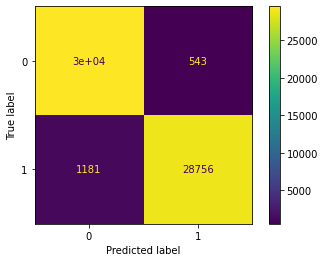

In [ ]:
#confusionMatrix(y_test_logreg, predicted, logreg_model, X_test_logreg)

<AxesSubplot:xlabel='0', ylabel='Count'>

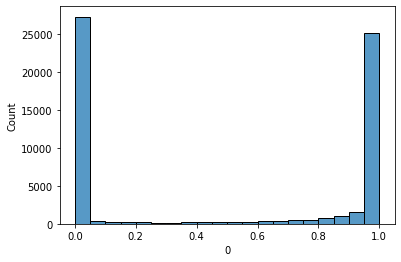

In [ ]:
df_prob = pickle.load(open('../03_logisticRegression/df_prob_3months.pkl', 'rb'))
sns.histplot(data=df_prob, x=df_prob[0], palette="dark:#5A9_r")

SVM

In [ ]:
svm_model = pickle.load(open('../04_svm/SVMmodel_3months.pkl', 'rb'))
X_test_svm = pickle.load(open('../04_svm/X_test_3months.pkl', 'rb'))
y_test_svm = pickle.load(open('../04_svm/y_test_3months.pkl', 'rb'))

c:\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SVC from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
accuracy, precision, recall, f1 = calculateMetrics(svm_model, X_test_svm, y_test_svm)
predicted = predictX(svm_model, X_test_svm)

Accuracy: 0.96620400
Precision: 0.97379029
Recall: 0.95816482
F1: 0.96591213


c:\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


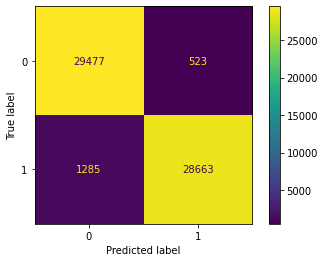

In [ ]:
confusionMatrix(y_test_svm, predicted, svm_model, X_test_svm)

Neural Network

In [ ]:
nn_model = load_model('../05_nn/nn_3months/')
X_test_nn = pickle.load(open('../05_nn/X_test_3months.pkl', 'rb'))
y_test_nn = pickle.load(open('../05_nn/y_test_3months.pkl', 'rb'))

In [ ]:
accuracy, precision, recall, f1, predicted, predicted_classes = calculateMetricsNN(nn_model, X_test_nn, y_test_nn)

1874/1874 [==============================] - 5s 2ms/step
Accuracy: 0.97087476
Precision: 0.97969111
Recall: 0.96163350
F1: 0.97057832


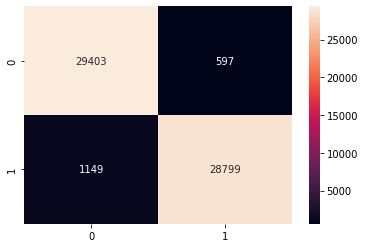

In [ ]:
cm = metrics.confusion_matrix(y_test_nn, predicted_classes)
f = sns.heatmap(cm, annot=True, fmt='d')